<a href="https://colab.research.google.com/github/habibekaya/q_learning/blob/main/q_learnin_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym
!pip install cmake 'gym[atari]' scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.2 MB/s eta 0:00:00


In [ ]:
pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gym
import random
#görselleştirme için
from IPython.display import display, clear_output   
from time import sleep   
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [ ]:
env = gym.make("Taxi-v3").env
env.reset()
env.render()

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't 

In [ ]:
#q table oluşturucaz. Başta hepsi 0 . Öğrendikçe tabloyu update edeceğiz.
q_table =np.zeros([env.observation_space.n,env.action_space.n])
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
print(env.observation_space.n)
print(env.action_space.n)
#6 action var :North - South - West - East - Pickup - Dropoff

500
6


In [ ]:
#hyperparameter =bizim değiştirebildiğimiz parametreler
#alpha= öğrenme oranı , gamma = future reward belirleyicisi ,ne kadar geleceğe gitmeliyim ,elimdekilerle yetinmeli miyim ,gelecekteki ödüllere mi odaklanmalı?
#epsilon:
#alpha ve gamma q-learnin denkleminden geliyor.Epsilon exploitation ya da exploration yapmak için kullanıcaz.
%%time
"""Training the agent"""
alpha=0.1
gamma=0.9
epsilon=0.1

#daha sonra sonuçları görselleştimek için 
reward_list=[]
dropout_list=[]
for i in range(1,10000):
  state=env.reset()#env'yi sürekli yeniden başlatıcak
  odul_sayacı =0
  ceza_sayısı=0#kaç kez hata yaptığını bulacak
  while True:
    #her action'dan önce exploit ya da explore yapacaına karar verecek.
    if random.uniform(0,1)< epsilon:
      action = env.action_space.sample() #env içinden random örnek verecek
    else:
      action = np.argmax(q_table[state])
    next_state , reward , done , info = env.step(action)
    old_value= q_table[state , action]
    next_max = np.max(q_table[next_state])

    next_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    #q table update
    q_table[state,action]=next_value
    #state güncelle
    state=next_state
    if reward== -10:
      ceza_sayısı +=1
      
    if done:
      break
    odul_sayacı += reward 
            
    
     
  if i%10 == 0:
        dropout_list.append(ceza_sayısı)
        reward_list.append(odul_sayacı)
        print("Episode: {}, reward {}, wrong dropout {}".format(i,odul_sayacı,ceza_sayısı))     
  
 
print("Training.\n")



Episode: 10, reward -710, wrong dropout 18
Episode: 20, reward -2310, wrong dropout 153
Episode: 30, reward -592, wrong dropout 27
Episode: 40, reward -868, wrong dropout 40
Episode: 50, reward -372, wrong dropout 10
Episode: 60, reward -337, wrong dropout 9
Episode: 70, reward -191, wrong dropout 4
Episode: 80, reward -447, wrong dropout 12
Episode: 90, reward -414, wrong dropout 9
Episode: 100, reward -442, wrong dropout 17
Episode: 110, reward -288, wrong dropout 7
Episode: 120, reward -244, wrong dropout 9
Episode: 130, reward -459, wrong dropout 16
Episode: 140, reward -228, wrong dropout 9
Episode: 150, reward -352, wrong dropout 8
Episode: 160, reward -153, wrong dropout 3
Episode: 170, reward -165, wrong dropout 9
Episode: 180, reward -5, wrong dropout 0
Episode: 190, reward -288, wrong dropout 5
Episode: 200, reward -178, wrong dropout 5
Episode: 210, reward -209, wrong dropout 6
Episode: 220, reward -218, wrong dropout 10
Episode: 230, reward -180, wrong dropout 5
Episode: 24

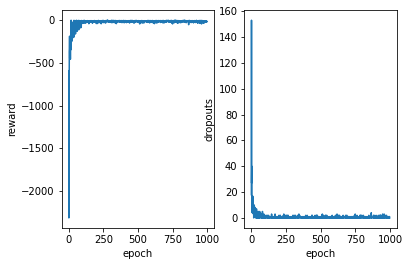

In [ ]:
import matplotlib.pyplot as plt 
fig ,axs = plt.subplots(1,2)
axs[0].plot(reward_list)
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("reward")

axs[1].plot(dropout_list)
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("dropouts")


plt.show()


In [ ]:

env.s = env.encode(0,0,3,4)


In [ ]:
q_table[2]

array([ 2.7847466 ,  4.34465815,  3.32566222,  2.23263633,  7.7147    ,
       -2.97028491])

In [ ]:
env.P[2]

{0: [(1.0, 102, -1, False)],
 1: [(1.0, 2, -1, False)],
 2: [(1.0, 22, -1, False)],
 3: [(1.0, 2, -1, False)],
 4: [(1.0, 18, -1, False)],
 5: [(1.0, 2, -10, False)]}

In [ ]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.24998822, -0.51255341, -1.84954238, -0.48943756,  1.62261467,
        -7.59270764],
       [ 2.7847466 ,  4.34465815,  3.32566222,  2.23263633,  7.7147    ,
        -2.97028491],
       ...,
       [-0.92416722,  7.64524312, -1.13615128, -1.23169501, -2.16562395,
        -1.99      ],
       [-2.59638902, -2.61394508, -2.60299627,  0.9952157 , -2.9701    ,
        -4.5318137 ],
       [ 1.23416763,  0.98439219,  1.04113294, 16.8902189 , -1.        ,
        -1.24734441]])